In [11]:
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [12]:
dir_path_results = os.path.join("..", "results")
os.listdir(dir_path_results)

['#1', '#2', '#3', '#4', '#5']

# Different `gnn_type`

## Drugs

In [13]:
metrics4drugs = ['rocauc', 'prauc', 'accuracy', 'jaccard', 'precision', 'recall', 'f1', 'ddi_pred', 'ddi_true']
metrics4items = ['rocauc', 'prauc', 'accuracy', 'jaccard', 'precision', 'recall', 'f1']

In [14]:
dict_df4drugs_gat = {k:[] for k in metrics4drugs}
for timestep in range(20):
    for metric in metrics4drugs:
        curr_ = []
        for i in os.listdir(dir_path_results):
            dir_path_results_dfs = os.path.join(dir_path_results, i, "dfs")
            curr_df = pd.read_csv(os.path.join(dir_path_results_dfs, "4DRUGS_gnn_type=GATConv_batch_size_by_HADMID=128.csv"))
            curr_.append(curr_df[metric].iloc[timestep])
        dict_df4drugs_gat[metric].append(curr_)

df4drugs_gat = pd.DataFrame(data=dict_df4drugs_gat)
df4drugs_gat

,rocauc,prauc,accuracy,jaccard,precision,recall,f1,ddi_pred,ddi_true
0,"[0.92883459434446, 0.9282777359123648, 0.92380...","[0.8868563809527572, 0.8835759557444335, 0.862...","[0.8905144273153994, 0.8900299427355112, 0.892...","[0.733720952693697, 0.7328058664608259, 0.7371...","[0.7949104302695463, 0.7940198640878202, 0.800...","[0.9050489647120492, 0.9048106936071862, 0.903...","[0.8464118191035397, 0.845802614874045, 0.8486...","[0.0975167304954623, 0.0971906084291651, 0.094...","[0.0951499584256348, 0.0951499584256348, 0.095..."
1,"[0.9527622979333256, 0.9527342575687744, 0.950...","[0.9080585906434872, 0.9071386714470148, 0.900...","[0.8982997192579079, 0.8983080498837878, 0.900...","[0.7575179756087872, 0.7577351300930796, 0.760...","[0.7868209857440531, 0.7863409811755983, 0.791...","[0.9531402294254367, 0.9541898882863068, 0.951...","[0.8620315537272275, 0.8621721408651076, 0.864...","[0.1008521931137043, 0.0991369334003311, 0.100...","[0.0989349216036878, 0.0989349216036878, 0.098..."
2,"[0.9613301177432884, 0.96220770753996, 0.96029...","[0.9202639456999248, 0.9218340648875352, 0.916...","[0.9080062822366192, 0.910495975442166, 0.9090...","[0.7764744145706852, 0.7812336415983249, 0.778...","[0.8033515041389057, 0.808313775049648, 0.8057...","[0.9586925095036676, 0.9588799057664508, 0.957...","[0.8741746103428494, 0.877182670878946, 0.8752...","[0.1016801483401862, 0.1017549435830218, 0.102...","[0.1011691909489327, 0.1011691909489327, 0.101..."
3,"[0.9677601092639064, 0.9687539748573872, 0.966...","[0.9311673827226568, 0.9317650294714128, 0.927...","[0.9189760450915924, 0.9205221543760764, 0.918...","[0.7982554456410507, 0.8013112187484711, 0.796...","[0.8244086562657272, 0.827798837503159, 0.8230...","[0.9617778299671208, 0.9616016909347112, 0.961...","[0.887810958755623, 0.8896976940000544, 0.8869...","[0.1007562959771707, 0.1023107337119523, 0.099...","[0.100065279564051, 0.100065279564051, 0.10006..."
4,"[0.9731188006532034, 0.9748517709683266, 0.972...","[0.939829677687606, 0.9436563498200246, 0.9378...","[0.929274091523797, 0.9302883566723378, 0.9288...","[0.8197609783212896, 0.8219002507662302, 0.818...","[0.8448626507404543, 0.8470594991959568, 0.844...","[0.9650242114906424, 0.9651223661824369, 0.964...","[0.9009545628102328, 0.9022450602557044, 0.900...","[0.0964244007681626, 0.0971346300538645, 0.100...","[0.1004239772147838, 0.1004239772147838, 0.100..."
5,"[0.9774348124555076, 0.9784086715306024, 0.978...","[0.9490019749733504, 0.9507025465285917, 0.952...","[0.9394759293113956, 0.939890310786106, 0.9410...","[0.8413114335016297, 0.8423576040401457, 0.844...","[0.8697145877378436, 0.8700561241333774, 0.874...","[0.9626325411334552, 0.963583180987203, 0.9604...","[0.9138176390961784, 0.9144344205412908, 0.915...","[0.0956782464425438, 0.0968148735546272, 0.095...","[0.0981646789159754, 0.0981646789159754, 0.098..."
6,"[0.9806356867771464, 0.981208343887338, 0.9816...","[0.9548236978258814, 0.9560514926738708, 0.956...","[0.9469570305968902, 0.9473750208995152, 0.947...","[0.857389024161828, 0.85877734155917, 0.858447...","[0.892006703300986, 0.8906122765520184, 0.8914...","[0.9566962046480522, 0.960040127069052, 0.9587...","[0.9232196518968196, 0.9240238971697544, 0.923...","[0.1016343093190291, 0.0989535042138873, 0.099...","[0.0996235522944893, 0.0996235522944893, 0.099..."
7,"[0.9844762968803514, 0.9846217799712942, 0.984...","[0.963263865231682, 0.9636047238188944, 0.9637...","[0.9550205032470124, 0.9549088124072568, 0.954...","[0.8769694060140532, 0.8770127948472451, 0.876...","[0.9085729788388496, 0.9061558523314898, 0.907...","[0.961849600306352, 0.9646259154659902, 0.9629...","[0.9344525309833284, 0.934477162068166, 0.9343...","[0.0970627678203635, 0.0925251021903102, 0.093...","[0.0960478053013256, 0.0960478053013256, 0.096..."
8,"[0.9876310342687946, 0.988260092933922, 0.9877...","[0.9700854433007304, 0.9711779849976576, 0.970...","[0.9621932990630356, 0.9630500565095336, 0.961...","[0.894955429

In [15]:
df4drugs_gat.rocauc.values

array([list([0.92883459434446, 0.9282777359123648, 0.9238087274070186, 0.9262714252519936, 0.927040606208926]),
       list([0.9527622979333256, 0.9527342575687744, 0.9507052104137432, 0.9524921241997896, 0.9511750710484516]),
       list([0.9613301177432884, 0.96220770753996, 0.9602941524187252, 0.9612994885975068, 0.9619603879827776]),
       list([0.9677601092639064, 0.9687539748573872, 0.9667704318244044, 0.9676422669907704, 0.966673683937797]),
       list([0.9731188006532034, 0.9748517709683266, 0.9728474755947522, 0.9741750249735032, 0.9729176955075064]),
       list([0.9774348124555076, 0.9784086715306024, 0.9788576259403962, 0.9786385312607576, 0.97737492923007]),
       list([0.9806356867771464, 0.981208343887338, 0.9816415720365788, 0.981464006527274, 0.9804572035726128]),
       list([0.9844762968803514, 0.9846217799712942, 0.9846906884619254, 0.9843484109566644, 0.9842366059339008]),
       list([0.9876310342687946, 0.988260092933922, 0.9877747781135564, 0.9872367085941316

In [16]:
def get_means(list_scores):
    return [np.array(scores).mean() for scores in list_scores]

get_means(df4drugs_gat.rocauc.values)

[0.9268466178249526,
 0.9519737922328169,
 0.9614183708564517,
 0.9675200933748531,
 0.9735821535394583,
 0.9781429140834668,
 0.9810813625601899,
 0.9844747564408273,
 0.9875855880693706,
 0.9894374882219988,
 0.9916320598859117,
 0.9926143076166228,
 0.9931771115737021,
 0.9940479755891405,
 0.9949607645234515,
 0.9955213025679065,
 0.995062844695001,
 0.9965372960832701,
 0.9971891548828165,
 0.997472968382511]

In [17]:
def get_stds(list_scores):
    return [np.array(scores).std() for scores in list_scores]

get_stds(df4drugs_gat.rocauc.values)

[0.0017662052996585942,
 0.0008620872527710393,
 0.0006637203725005866,
 0.0007580763692035122,
 0.0007949059074955277,
 0.0006194005321493741,
 0.0004614274950175173,
 0.00016788315848714254,
 0.00043091183036272527,
 0.00014080105297581785,
 0.0004534567397544946,
 0.0003854687785731452,
 0.000557963608494086,
 0.0002604467226968882,
 0.0002672908116572656,
 0.000276495317787786,
 0.0003838184001210795,
 0.0002090163991310131,
 0.00025190282299495325,
 0.00024875643001451124]

In [18]:
dict_df4drugs_gen = {k:[] for k in metrics4drugs}
for timestep in range(20):
    for metric in metrics4drugs:
        curr_ = []
        for i in os.listdir(dir_path_results):
            dir_path_results_dfs = os.path.join(dir_path_results, i, "dfs")
            curr_df = pd.read_csv(os.path.join(dir_path_results_dfs, "4DRUGS_gnn_type=GENConv_batch_size_by_HADMID=128.csv"))
            curr_.append(curr_df[metric].iloc[timestep])
        dict_df4drugs_gen[metric].append(curr_)

df4drugs_gen = pd.DataFrame(data=dict_df4drugs_gen)

In [19]:
get_means(df4drugs_gen.ddi_true.values)

[0.0951499584256348,
 0.0989349216036878,
 0.1011691909489327,
 0.10006527956405101,
 0.1004239772147838,
 0.0981646789159754,
 0.0996235522944893,
 0.0960478053013256,
 0.0946766452707883,
 0.0928835139558117,
 0.0895326568113188,
 0.0850094447535354,
 0.0838576892691239,
 0.0831635098918296,
 0.0816255385680716,
 0.0773952069148768,
 0.0729461877515252,
 0.0742401660260638,
 0.075421010210616,
 0.0713861216765661]

In [20]:
get_stds(df4drugs_gen.ddi_pred.values)

[0.0011236627423180903,
 0.0011921987176199205,
 0.0020453935967099986,
 0.0010098624133535287,
 0.0010012776880631155,
 0.001257632349990258,
 0.0010791226315672493,
 0.0027166762260947734,
 0.002037913617059954,
 0.001705671166584726,
 0.0017781711367234165,
 0.0016236325135583396,
 0.0011144661083164155,
 0.0009097635497862836,
 0.0016641741409062615,
 0.0007104885417048533,
 0.0018990972988036942,
 0.001671869823999893,
 0.001336411644504969,
 0.001881626598794308]

In [21]:
dict_df4drugs_gine = {k:[] for k in metrics4drugs}
for timestep in range(20):
    for metric in metrics4drugs:
        curr_ = []
        for i in os.listdir(dir_path_results):
            dir_path_results_dfs = os.path.join(dir_path_results, i, "dfs")
            curr_df = pd.read_csv(os.path.join(dir_path_results_dfs, "4DRUGS_gnn_type=GINEConv_batch_size_by_HADMID=128.csv"))
            curr_.append(curr_df[metric].iloc[timestep])
        dict_df4drugs_gine[metric].append(curr_)

df4drugs_gine = pd.DataFrame(data=dict_df4drugs_gine)

## Items

In [22]:
dict_df4items_gat = {k:[] for k in metrics4items}
for timestep in range(20):
    for metric in metrics4items:
        curr_ = []
        for i in os.listdir(dir_path_results):
            dir_path_results_dfs = os.path.join(dir_path_results, i, "dfs")
            curr_df = pd.read_csv(os.path.join(dir_path_results_dfs, "4ITEMS_gnn_type=GATConv_batch_size_by_HADMID=128.csv"))
            curr_.append(curr_df[metric].iloc[timestep])
        dict_df4items_gat[metric].append(curr_)

df4items_gat = pd.DataFrame(data=dict_df4items_gat)

In [23]:
dict_df4items_gen = {k:[] for k in metrics4items}
for timestep in range(20):
    for metric in metrics4items:
        curr_ = []
        for i in os.listdir(dir_path_results):
            dir_path_results_dfs = os.path.join(dir_path_results, i, "dfs")
            curr_df = pd.read_csv(os.path.join(dir_path_results_dfs, "4ITEMS_gnn_type=GENConv_batch_size_by_HADMID=128.csv"))
            curr_.append(curr_df[metric].iloc[timestep])
        dict_df4items_gen[metric].append(curr_)

df4items_gen = pd.DataFrame(data=dict_df4items_gen)

In [24]:
dict_df4items_gine = {k:[] for k in metrics4items}
for timestep in range(20):
    for metric in metrics4items:
        curr_ = []
        for i in os.listdir(dir_path_results):
            dir_path_results_dfs = os.path.join(dir_path_results, i, "dfs")
            curr_df = pd.read_csv(os.path.join(dir_path_results_dfs, "4ITEMS_gnn_type=GINEConv_batch_size_by_HADMID=128.csv"))
            curr_.append(curr_df[metric].iloc[timestep])
        dict_df4items_gine[metric].append(curr_)

df4items_gine = pd.DataFrame(data=dict_df4items_gine)

## Visualization

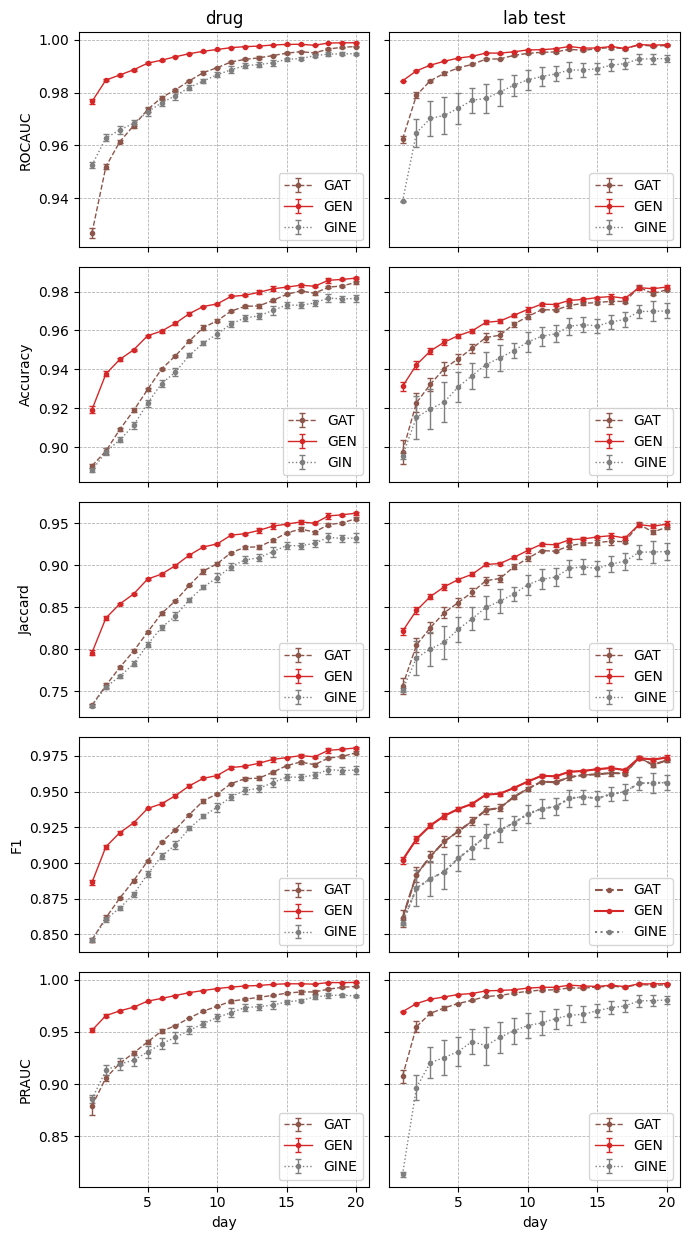

In [25]:
fmts = ('.C7:', '.C5--', '.C2:', '.C3-')
timesteps = range(1, 20+1)

fig, axs = plt.subplots(5, 2, sharex="all", sharey="row", figsize=(3.5*2, 2.5*5))

# AUC
axs[0, 0].set_title('drug')
axs[0, 0].errorbar(timesteps, get_means(df4drugs_gat.rocauc.values),  get_stds(df4drugs_gat.rocauc.values),  fmt=fmts[1], linewidth=1, capsize=2)
axs[0, 0].errorbar(timesteps, get_means(df4drugs_gen.rocauc.values),  get_stds(df4drugs_gen.rocauc.values),  fmt=fmts[3], linewidth=1, capsize=2)
axs[0, 0].errorbar(timesteps, get_means(df4drugs_gine.rocauc.values), get_stds(df4drugs_gine.rocauc.values), fmt=fmts[0], linewidth=1, capsize=2)
axs[0, 0].set_ylabel('ROCAUC')
axs[0, 0].legend(["GAT", "GEN", "GINE"])
axs[0, 0].grid(True, linestyle='--', linewidth=.57)
axs[0, 1].set_title('lab test')
axs[0, 1].errorbar(timesteps, get_means(df4items_gat.rocauc.values),  get_stds(df4items_gat.rocauc.values),  fmt=fmts[1], linewidth=1, capsize=2)
axs[0, 1].errorbar(timesteps, get_means(df4items_gen.rocauc.values),  get_stds(df4items_gen.rocauc.values),  fmt=fmts[3], linewidth=1, capsize=2)
axs[0, 1].errorbar(timesteps, get_means(df4items_gine.rocauc.values), get_stds(df4items_gine.rocauc.values), fmt=fmts[0], linewidth=1, capsize=2)
axs[0, 1].legend(["GAT", "GEN", "GINE"])
axs[0, 1].grid(True, linestyle='--', linewidth=.57)

# ACC
axs[1, 0].errorbar(timesteps, get_means(df4drugs_gat.accuracy.values),  get_stds(df4drugs_gat.accuracy.values),  fmt=fmts[1], linewidth=1, capsize=2)
axs[1, 0].errorbar(timesteps, get_means(df4drugs_gen.accuracy.values),  get_stds(df4drugs_gen.accuracy.values),  fmt=fmts[3], linewidth=1, capsize=2)
axs[1, 0].errorbar(timesteps, get_means(df4drugs_gine.accuracy.values), get_stds(df4drugs_gine.accuracy.values), fmt=fmts[0], linewidth=1, capsize=2)
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend(["GAT", "GEN", "GIN"])
axs[1, 0].grid(True, linestyle='--', linewidth=.57)
axs[1, 1].errorbar(timesteps, get_means(df4items_gat.accuracy.values),  get_stds(df4items_gat.accuracy.values),  fmt=fmts[1], linewidth=1, capsize=2)
axs[1, 1].errorbar(timesteps, get_means(df4items_gen.accuracy.values),  get_stds(df4items_gen.accuracy.values),  fmt=fmts[3], linewidth=1, capsize=2)
axs[1, 1].errorbar(timesteps, get_means(df4items_gine.accuracy.values), get_stds(df4items_gine.accuracy.values), fmt=fmts[0], linewidth=1, capsize=2)
axs[1, 1].legend(["GAT", "GEN", "GINE"])
axs[1, 1].grid(True, linestyle='--', linewidth=.57)

# JACCARD
axs[2, 0].errorbar(timesteps, get_means(df4drugs_gat.jaccard.values),  get_stds(df4drugs_gat.jaccard.values),  fmt=fmts[1], linewidth=1, capsize=2)
axs[2, 0].errorbar(timesteps, get_means(df4drugs_gen.jaccard.values),  get_stds(df4drugs_gen.jaccard.values),  fmt=fmts[3], linewidth=1, capsize=2)
axs[2, 0].errorbar(timesteps, get_means(df4drugs_gine.jaccard.values), get_stds(df4drugs_gine.jaccard.values), fmt=fmts[0], linewidth=1, capsize=2)
axs[2, 0].set_ylabel('Jaccard')
axs[2, 0].legend(["GAT", "GEN", "GINE"])
axs[2, 0].grid(True, linestyle='--', linewidth=.57)
axs[2, 1].errorbar(timesteps, get_means(df4items_gat.jaccard.values),  get_stds(df4items_gat.jaccard.values),  fmt=fmts[1], linewidth=1, capsize=2)
axs[2, 1].errorbar(timesteps, get_means(df4items_gen.jaccard.values),  get_stds(df4items_gen.jaccard.values),  fmt=fmts[3], linewidth=1, capsize=2)
axs[2, 1].errorbar(timesteps, get_means(df4items_gine.jaccard.values), get_stds(df4items_gine.jaccard.values), fmt=fmts[0], linewidth=1, capsize=2)
axs[2, 1].legend(["GAT", "GEN", "GINE"])
axs[2, 1].grid(True, linestyle='--', linewidth=.57)

# F1
axs[3, 0].errorbar(timesteps, get_means(df4drugs_gat.f1.values),  get_stds(df4drugs_gat.f1.values),  fmt=fmts[1], linewidth=1, capsize=2)
axs[3, 0].errorbar(timesteps, get_means(df4drugs_gen.f1.values),  get_stds(df4drugs_gen.f1.values),  fmt=fmts[3], linewidth=1, capsize=2)
axs[3, 0].errorbar(timesteps, get_means(df4drugs_gine.f1.values), get_stds(df4drugs_gine.f1.values), fmt=fmts[0], linewidth=1, capsize=2)
axs[3, 0].set_ylabel('F1')
axs[3, 0].legend(["GAT", "GEN", "GINE"])
axs[3, 0].grid(True, linestyle='--', linewidth=.57)
axs[3, 1].plot(timesteps, get_means(df4items_gat.f1.values), fmts[1],
               timesteps, get_means(df4items_gen.f1.values), fmts[3],
               timesteps, get_means(df4items_gine.f1.values), fmts[0])
axs[3, 1].errorbar(timesteps, get_means(df4items_gat.f1.values),  get_stds(df4items_gat.f1.values),  fmt=fmts[1], linewidth=1, capsize=2)
axs[3, 1].errorbar(timesteps, get_means(df4items_gen.f1.values),  get_stds(df4items_gen.f1.values),  fmt=fmts[3], linewidth=1, capsize=2)
axs[3, 1].errorbar(timesteps, get_means(df4items_gine.f1.values), get_stds(df4items_gine.f1.values), fmt=fmts[0], linewidth=1, capsize=2)
axs[3, 1].legend(["GAT", "GEN", "GINE"])
axs[3, 1].grid(True, linestyle='--', linewidth=.57)

# PRAUC
axs[4, 0].errorbar(timesteps, get_means(df4drugs_gat.prauc.values),  get_stds(df4drugs_gat.prauc.values),  fmt=fmts[1], linewidth=1, capsize=2)
axs[4, 0].errorbar(timesteps, get_means(df4drugs_gen.prauc.values),  get_stds(df4drugs_gen.prauc.values),  fmt=fmts[3], linewidth=1, capsize=2)
axs[4, 0].errorbar(timesteps, get_means(df4drugs_gine.prauc.values), get_stds(df4drugs_gine.prauc.values), fmt=fmts[0], linewidth=1, capsize=2)
axs[4, 0].set_ylabel('PRAUC')
axs[4, 0].legend(["GAT", "GEN", "GINE"])
axs[4, 0].grid(True, linestyle='--', linewidth=.57)
axs[4, 0].set_xlabel('day')
axs[4, 1].errorbar(timesteps, get_means(df4items_gat.prauc.values),  get_stds(df4items_gat.prauc.values),  fmt=fmts[1], linewidth=1, capsize=2)
axs[4, 1].errorbar(timesteps, get_means(df4items_gen.prauc.values),  get_stds(df4items_gen.prauc.values),  fmt=fmts[3], linewidth=1, capsize=2)
axs[4, 1].errorbar(timesteps, get_means(df4items_gine.prauc.values), get_stds(df4items_gine.prauc.values), fmt=fmts[0], linewidth=1, capsize=2)
axs[4, 1].legend(["GAT", "GEN", "GINE"])
axs[4, 1].grid(True, linestyle='--', linewidth=.57)
axs[4, 1].set_xlabel('day')

# fig.suptitle('Performance of different downstream recommendation tasks \n')
plt.tight_layout()

# Total performance

## Drugs

In [26]:
dict_gat = {
    'rocauc': [],
    'prauc': [],
    'accuracy': [],
    'jaccard': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'ddi_pred': [],
    'ddi_true': []
}
for i in os.listdir(dir_path_results):
    dir_path_results_drugs = os.path.join(dir_path_results, f"{i}", "total_dicts")
    with open(os.path.join(dir_path_results_drugs, "4DRUGS_gnn_type=GATConv_batch_size_by_HADMID=128.pickle"), 'rb') as f:
        current_pickle = pickle.load(f)
        for k in [key for key in dict_gat.keys()]:
            dict_gat[k].append(current_pickle[k])

for k, v in dict_gat.items():
    arr = np.array(v)
    print(f"{k:>9}: mean={arr.mean():.4f}, std={arr.std():.4f}")

   rocauc: mean=0.9785, std=0.0003
    prauc: mean=0.9549, std=0.0007
 accuracy: mean=0.9372, std=0.0005
  jaccard: mean=0.8358, std=0.0010
precision: mean=0.8666, std=0.0013
   recall: mean=0.9593, std=0.0007
       f1: mean=0.9106, std=0.0006
 ddi_pred: mean=0.0933, std=0.0004
 ddi_true: mean=0.0940, std=0.0000


In [27]:
dict_gen = {
    'rocauc': [],
    'prauc': [],
    'accuracy': [],
    'jaccard': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'ddi_pred': [],
    'ddi_true': []
}

for i in os.listdir(dir_path_results):
    dir_path_results_drugs = os.path.join(dir_path_results, f"{i}", "total_dicts")
    with open(os.path.join(dir_path_results_drugs, "4DRUGS_gnn_type=GENConv_batch_size_by_HADMID=128.pickle"), 'rb') as f:
        current_pickle = pickle.load(f)
        for k in [key for key in dict_gen.keys()]:
            dict_gen[k].append(current_pickle[k])

for k, v in dict_gen.items():
    arr = np.array(v)
    print(f"{k:>9}: mean={arr.mean():.4f}, std={arr.std():.4f}")

print(dict_gen['ddi_true'])

   rocauc: mean=0.9923, std=0.0002
    prauc: mean=0.9830, std=0.0004
 accuracy: mean=0.9582, std=0.0006
  jaccard: mean=0.8857, std=0.0014
precision: mean=0.9090, std=0.0020
   recall: mean=0.9719, std=0.0011
       f1: mean=0.9394, std=0.0008
 ddi_pred: mean=0.0897, std=0.0005
 ddi_true: mean=0.0940, std=0.0000
[0.09402405736670619, 0.09402405736670619, 0.09402405736670619, 0.09402405736670619, 0.09402405736670619]


In [28]:
dict_gine = {
    'rocauc': [],
    'prauc': [],
    'accuracy': [],
    'jaccard': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'ddi_pred': [],
    'ddi_true': []
}
for i in os.listdir(dir_path_results):
    dir_path_results_drugs = os.path.join(dir_path_results, f"{i}", "total_dicts")
    with open(os.path.join(dir_path_results_drugs, "4DRUGS_gnn_type=GINEConv_batch_size_by_HADMID=128.pickle"), 'rb') as f:
        current_pickle = pickle.load(f)
        for k in [key for key in dict_gine.keys()]:
            dict_gine[k].append(current_pickle[k])

for k, v in dict_gine.items():
    arr = np.array(v)
    print(f"{k:>9}: mean={arr.mean():.4f}, std={arr.std():.4f}")

   rocauc: mean=0.9785, std=0.0010
    prauc: mean=0.9471, std=0.0032
 accuracy: mean=0.9318, std=0.0010
  jaccard: mean=0.8242, std=0.0020
precision: mean=0.8542, std=0.0028
   recall: mean=0.9592, std=0.0015
       f1: mean=0.9036, std=0.0012
 ddi_pred: mean=0.0848, std=0.0012
 ddi_true: mean=0.0940, std=0.0000


## Items

In [29]:
dict_gat = {
    'rocauc': [],
    'prauc': [],
    'accuracy': [],
    'jaccard': [],
    'precision': [],
    'recall': [],
    'f1': []
}
for i in os.listdir(dir_path_results):
    dir_path_results_drugs = os.path.join(dir_path_results, f"{i}", "total_dicts")
    with open(os.path.join(dir_path_results_drugs, "4ITEMS_gnn_type=GATConv_batch_size_by_HADMID=128.pickle"), 'rb') as f:
        current_pickle = pickle.load(f)
        for k in [key for key in dict_gat.keys()]:
            dict_gat[k].append(current_pickle[k])

for k, v in dict_gat.items():
    arr = np.array(v)
    print(f"{k:>9}: mean={arr.mean():.4f}, std={arr.std():.4f}")

   rocauc: mean=0.9881, std=0.0002
    prauc: mean=0.9754, std=0.0005
 accuracy: mean=0.9436, std=0.0027
  jaccard: mean=0.8512, std=0.0053
precision: mean=0.8769, std=0.0106
   recall: mean=0.9668, std=0.0059
       f1: mean=0.9196, std=0.0031


In [30]:
dict_gen = {
    'rocauc': [],
    'prauc': [],
    'accuracy': [],
    'jaccard': [],
    'precision': [],
    'recall': [],
    'f1': []
}
for i in os.listdir(dir_path_results):
    dir_path_results_drugs = os.path.join(dir_path_results, f"{i}", "total_dicts")
    with open(os.path.join(dir_path_results_drugs, "4ITEMS_gnn_type=GENConv_batch_size_by_HADMID=128.pickle"), 'rb') as f:
        current_pickle = pickle.load(f)
        for k in [key for key in dict_gen.keys()]:
            dict_gen[k].append(current_pickle[k])

for k, v in dict_gen.items():
    arr = np.array(v)
    print(f"{k:>9}: mean={arr.mean():.4f}, std={arr.std():.4f}")

   rocauc: mean=0.9928, std=0.0001
    prauc: mean=0.9855, std=0.0002
 accuracy: mean=0.9569, std=0.0012
  jaccard: mean=0.8817, std=0.0025
precision: mean=0.9114, std=0.0059
   recall: mean=0.9644, std=0.0037
       f1: mean=0.9371, std=0.0014


In [31]:
dict_gine = {
    'rocauc': [],
    'prauc': [],
    'accuracy': [],
    'jaccard': [],
    'precision': [],
    'recall': [],
    'f1': []
}
for i in os.listdir(dir_path_results):
    dir_path_results_drugs = os.path.join(dir_path_results, f"{i}", "total_dicts")
    with open(os.path.join(dir_path_results_drugs, "4ITEMS_gnn_type=GINEConv_batch_size_by_HADMID=128.pickle"), 'rb') as f:
        current_pickle = pickle.load(f)
        for k in [key for key in dict_gine.keys()]:
            dict_gine[k].append(current_pickle[k])

for k, v in dict_gine.items():
    arr = np.array(v)
    print(f"{k:>9}: mean={arr.mean():.4f}, std={arr.std():.4f}")

   rocauc: mean=0.9755, std=0.0043
    prauc: mean=0.9368, std=0.0114
 accuracy: mean=0.9327, std=0.0061
  jaccard: mean=0.8273, std=0.0125
precision: mean=0.8526, std=0.0158
   recall: mean=0.9655, std=0.0041
       f1: mean=0.9054, std=0.0075
